In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

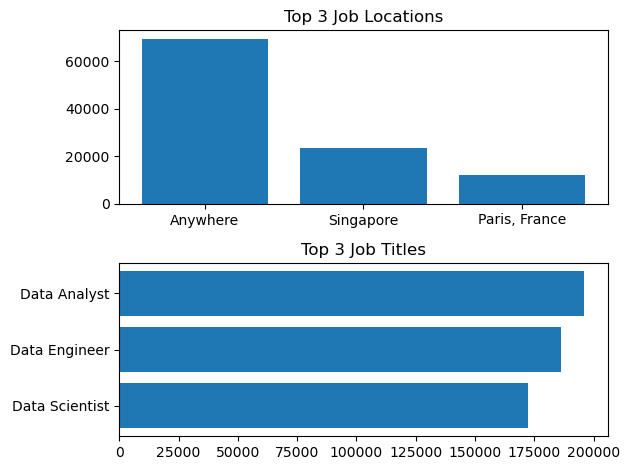

In [7]:
#Subplots with bar charts

#Create a subplot with 2 rows and 1 column:
fig, ax = plt.subplots(2, 1)

#In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
#df['job_location'].value_counts().head(3).plot(kind = 'bar', ax = ax[0])
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

#In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
#df['job_title_short'].value_counts().head(3).plot(kind = 'barh', ax = ax[1])
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()

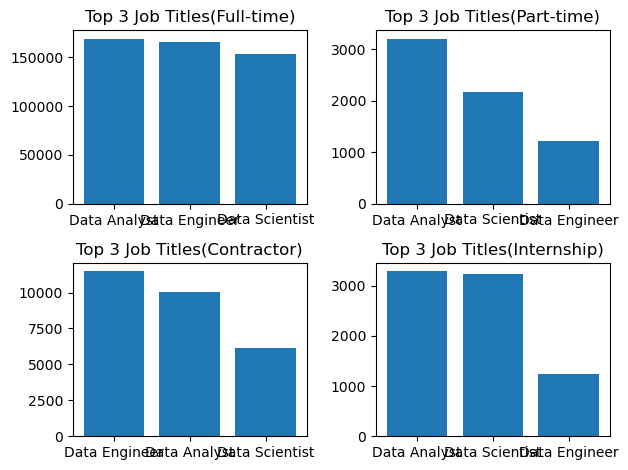

In [ ]:
#Subplots with job titles by schedule

#Create a subplot with 2 rows and 2 columns:
fig, ax = plt.subplots(2,2)

#In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

# df_schedule_count = df.value_counts('job_schedule_type')

for i, schedules in enumerate(schedules):
     df_plot = df[df['job_schedule_type'] == schedules]
     #df_plot.plot(kind='bar', x='job_title_short', y= df_scheudle_count, ax=ax[i])
     job_titles = df_plot['job_title_short'].value_counts().head(3) 
     ax[i//2, i%2].bar(job_titles.index, job_titles.values)
     ax[i//2, i%2].set_title(f'Top 3 Job Titles({schedules})')

fig.tight_layout()
plt.show()



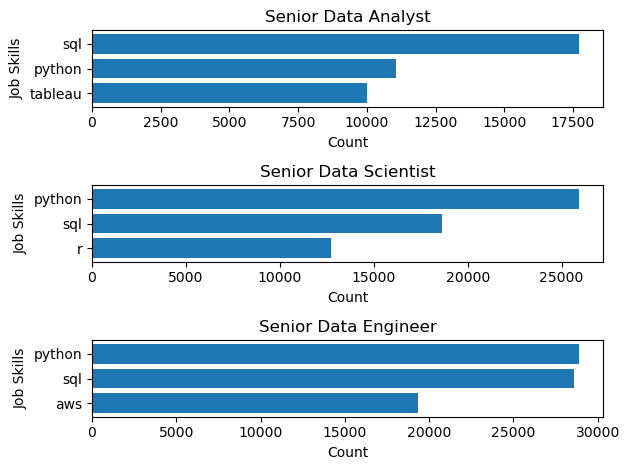

In [3]:
#Top Skills for Job roles

#In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
df_skills = df.explode('job_skills')
#Create a subplot with 3 rows and 1 column:
fig, ax = plt.subplots(len(job_roles),1)

for i, roles in enumerate(job_roles):
#     df_plot = df[df['job_title_short'] == job_roles]
#     job_counts = df_plot['job_skills'].value_counts().head(3)
#     ax[i].barh(job_counts.index, job_counts.values).invert_yaxis()
    role_skills = df_skills[df_skills['job_title_short'] == roles]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(roles)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()

fig.tight_layout()
plt.show()
